# HW3-1: Comparison of different clustering algorithms
In our lecture, we talked about **K-means clustering**, **spectral clustering** and **Leiden clustering(a modified version of louvain clustering algorithm)**. 

In this homework, we will play around with those three algorithms on different datasets, and see how those algorithms perform in different circumstances.

#### Note

For all two notebooks, please insert your code under comments like this:
```
# =========================================
# instruction on what to implement
# REPLACE `pass` WITH YOUR CODE or INSERT YOUR CODE BELOW
# =========================================
```

**You can add additional lines of code when necessary.**

In [ ]:
# download louvain package
!pip install louvain python-igraph leidenalg graphtools

     |████████████████████████████████| 1.1 MB 10.3 MB/s 
     |████████████████████████████████| 1.4 MB 46.8 MB/s 
     |████████████████████████████████| 45 kB 2.8 MB/s 
     |████████████████████████████████| 3.1 MB 61.9 MB/s 
     |████████████████████████████████| 1.8 MB 49.7 MB/s 


In [ ]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=14)

import sklearn
import sklearn.cluster
import sklearn.datasets

import louvain
import graphtools as gt

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  del sys.path[0]


## Dataset generation
First, we need to generate different datasets for clustering. We will use three datasets in $\mathbb{R}^2$: (**Note that the real data is usually high-dimensional, we use 2 dimensional dataset here just for better visualization**).

* **Double-circles**: Dataset of the shape of two circles with the same center but different radius.

* **Regular blobs**: several regular blobs, regular cluster shape.

* **Uniform distribution**: Data generated from uniform distribution.

You don't need to do anything at this step, since we have already implemented it for you.

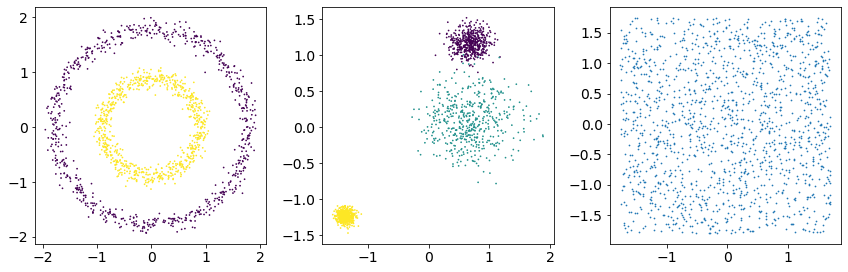

In [ ]:
np.random.seed(0)
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500

# Circles
noisy_circles = sklearn.datasets.make_circles(
    n_samples=n_samples, 
    # Scale factor between inner and outer circle
    factor=.5,
    # Gaussian noise added to each point
    noise=.05)

# Uniform square
no_structure = (np.random.uniform(size=(n_samples, 2)), None)

# blobs with varied variances
varied = sklearn.datasets.make_blobs(n_samples=n_samples,
                                     cluster_std=[1.0, 2.5, 0.5],
                                     random_state=8)

# ============
# Associate each dataset with the correct # of clusters
# ============

default_base = {'n_clusters': 3}

generated_datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (varied,      {}),
    (no_structure, {})]
  
fig, axes = plt.subplots(1,3,figsize=(12,4))

for i, (dataset, _) in enumerate(generated_datasets):
    ax = axes[i]
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)
    ax.scatter(X[:,0], X[:,1], c=y, s = 0.5)
    
fig.tight_layout()

## K-means algorithm
You need to fill in the blank area of the k-means algorithm below. You will implement this part using `sklearn`.

**Useful tutorial**:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


In [ ]:
def kmeans_skl(X, n_clusts):
    """\
    Kmeans algorithm

    Parameters:
    -----------
    X:
      dataset, numpy array of the shape (n_samples, n_features)
    n_clusts:
      number of clusters
    
    Return:
    ----------
    group:
      group identity of the clustering result, numpy array of the shape (n_samples,). 
      e.g, if there are three data samples clustered into two groups, the return should be something like, numpy.array([0,1,1])
    """
    # =========================================
    # implement kmeans algorithm using sklearn
    # REPLACE `pass` WITH YOUR CODE
    # =========================================
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusts, random_state=0).fit_predict(X)
    groups = np.array(kmeans)
    return groups

## Spectral clustering algorithm
You need to fill in the blank area of the spectral clustering algorithm below. You will implement this part using `sklearn`.

**Useful tutorial**:
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

**Note**:
* Make sure to set the `affinity` in spectral clustering function to `"nearest_neighbors"`. The default setting in sklearn was `"rbf"`, which will not produce a very good result.

In [ ]:
def spectral_skl(X, n_clusts):
    """\
    spectral clustering algorithm

    Parameters:
    -----------
    X:
      dataset, numpy array of the shape (n_samples, n_features)
    n_clusts:
      number of clusters
    
    Return:
    ----------
    group:
      group identity of the clustering result, numpy array of the shape (n_samples,). 
      e.g, if there are three data samples clustered into two groups, the return should be something like, numpy.array([0,1,1])
    """
    # =========================================
    # implement spectral clustering algorithm using sklearn
    # REPLACE `pass` WITH YOUR CODE
    # =========================================
    ss = sklearn.cluster.SpectralClustering(n_clusters=n_clusts, affinity='nearest_neighbors')
    groups = ss.fit_predict(X)
    return groups

## Leiden algorithm
Leiden algorithm is a graph based algorithm, instead of specifying the number of clusters, leiden algorithm use resolution to control the size of clusters.

You don't need to do anything here, we have already implemented leiden algorithm for you, but you can play around with the resolution term to see how this will affect the number of clusters

In [ ]:
def leiden(X, resolution=0.01):
    """\
    leiden clustering algorithm.

    Parameters:
    -----------
    X:
      dataset, numpy array of the shape (n_samples, n_features)
    resolution:
      resolution term
    
    Return:
    ----------
    group:
      group identity of the clustering result, numpy array of the shape (n_samples,). 
      e.g, if there are three data samples clustered into two groups, the return should be something like, numpy.array([0,1,1])
    """ 
    G = gt.Graph(X)
    G_igraph = G.to_igraph()
    part = louvain.find_partition(G_igraph, louvain.RBConfigurationVertexPartition, 
                                  weights="weight", resolution_parameter=resolution)
    groups = np.array(part.membership)
    return groups

## Test the algorithms in different datasets
We will test the algorithms in different datasets. Run the code below and see how the algorithms perform under different circumstances. Submit the plots that you generate. Discuss with your collaborator and briefly discribe what you find in you submission.


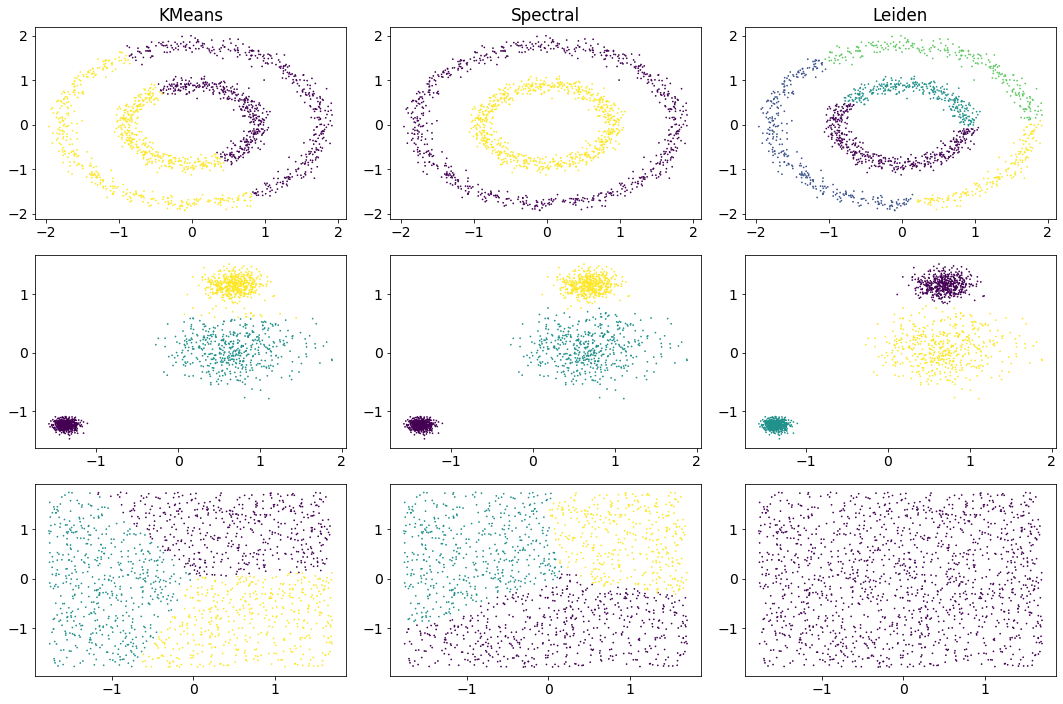

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))
plot_title = True

titles = ['KMeans', 'Spectral', 'Leiden']

# loop through all three datasets
for i_dataset, (dataset, cluster_params) in enumerate(generated_datasets):
    
    params = default_base.copy()
    params.update(cluster_params)

    X, y = dataset
    
    # normalize dataset
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)
    
    # ============
    # Run clustering algorithms
    # ============
    clusters = []
    
    # KMeans
    clusters.append(kmeans_skl(X, n_clusts = params['n_clusters']))
    
    # Spectral Clustering
    clusters.append(spectral_skl(X, n_clusts = params['n_clusters']))
    
    # Leiden
    clusters.append(leiden(X, resolution = 0.01))
 
    # ============
    # Plot clustering results
    # ============
    row_axes = axes[i_dataset]
    
    i = 1
    for i, ax in enumerate(row_axes.flatten()):
        curr_cluster = clusters[i]
        if plot_title:
            curr_title = '{}'.format(titles[i])
        else:
            curr_title = None
            
        ax.scatter(X[:,0], X[:,1], c=curr_cluster, s = 0.5)
        ax.set_title(curr_title)

    plot_title=False
fig.tight_layout()

## Running time
Next we will test the running time of the algorithms with datasets of different sizes. We will use the **Regular blobs** shaped dataset with different number of samples: 1000, 5000, 10000 and see how the running time changes. Report your running times. Discuss with your collaborator about what you see, briefly analyze the result in your submission.


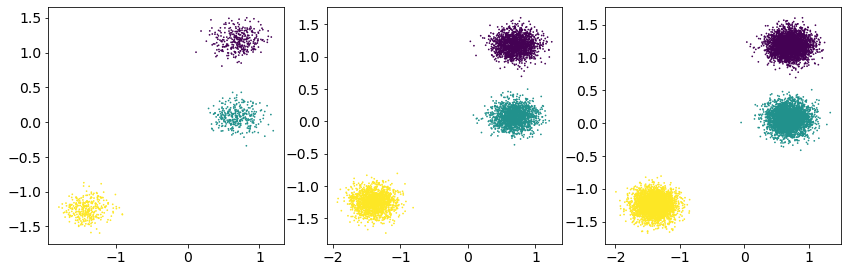

In [ ]:
np.random.seed(0)

# generated datasets
generated_datasets = [(sklearn.datasets.make_blobs(n_samples=n_samples, random_state=8, cluster_std=1), n_samples) for n_samples in [1000, 5000, 10000]]
  
fig, axes = plt.subplots(1,3,figsize=(12,4))

for i, (dataset, _) in enumerate(generated_datasets):
    ax = axes[i]
    X, y = dataset
    
    # normalize dataset for easier parameter selection
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)
    ax.scatter(X[:,0], X[:,1], c=y, s = 0.5)
    
fig.tight_layout()

dataset: 0, number of samples: 1000
	 running time for k-means(sec): 0.017456531524658203
	 running time for spectral clustering(sec): 0.3877573013305664
	 running time for leiden algorithm(sec): 0.14533782005310059
dataset: 1, number of samples: 5000
	 running time for k-means(sec): 0.17523550987243652
	 running time for spectral clustering(sec): 3.8598217964172363
	 running time for leiden algorithm(sec): 0.3115050792694092
dataset: 2, number of samples: 10000
	 running time for k-means(sec): 0.11646461486816406
	 running time for spectral clustering(sec): 9.415756702423096
	 running time for leiden algorithm(sec): 0.805823564529419


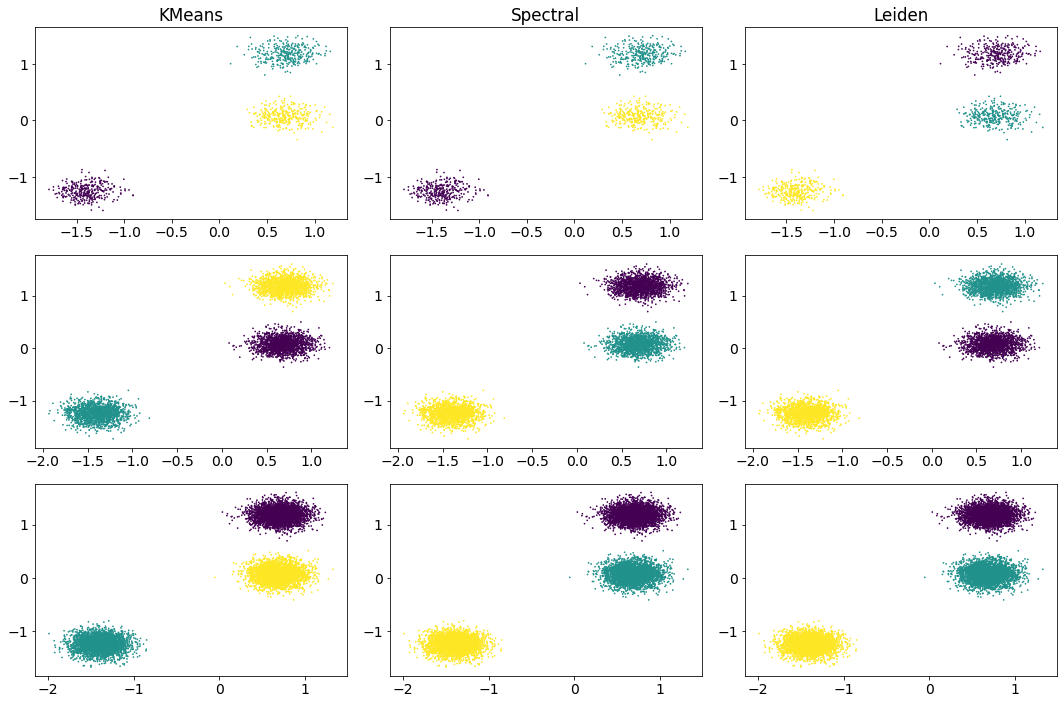

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(15, 10))
plot_title = True


titles = ['KMeans', 'Spectral', 'Leiden']

# loop through all three datasets
for i_dataset, (dataset, n_samples) in enumerate(generated_datasets):
    print("dataset: "+str(i_dataset)+", number of samples: " + str(n_samples))
    
    params = default_base.copy()
    params.update(cluster_params)

    X, y = dataset
    
    # normalize dataset
    X = sklearn.preprocessing.StandardScaler().fit_transform(X)
    
    # ============
    # Run clustering algorithms
    # ============
    clusters = []
    
    
    # KMeans
    tic = time.time()
    clusters.append(kmeans_skl(X, n_clusts = 3))
    print("\t running time for k-means(sec):", time.time() - tic)
    
    # Spectral Clustering
    tic = time.time()
    clusters.append(spectral_skl(X, n_clusts = 3))
    print("\t running time for spectral clustering(sec):", time.time() - tic)
    
    # Leiden
    tic = time.time()
    clusters.append(leiden(X, resolution = 0.01))
    print("\t running time for leiden algorithm(sec):", time.time() - tic)

    # ============
    # Plot clustering results
    # ============
    row_axes = axes[i_dataset]
    
    for i, ax in enumerate(row_axes.flatten()):
        curr_cluster = clusters[i]
        if plot_title:
            curr_title = '{}'.format(titles[i])
        else:
            curr_title = None
            
        ax.scatter(X[:,0], X[:,1], c=curr_cluster, s = 0.5)
        ax.set_title(curr_title)
    


    plot_title=False
fig.tight_layout()

## Additional reading:
* **SpectralNet** is a fast implementation of spectral clustering algorithm with deep neural network. It has the advantage of spectral clustering and also scales well to large datasets: https://arxiv.org/abs/1801.01587  

* **Quora discussion** about the pros and cons of spectral clustering and k-means: https://www.quora.com/What-are-the-advantages-of-spectral-clustering-over-k-means-clustering


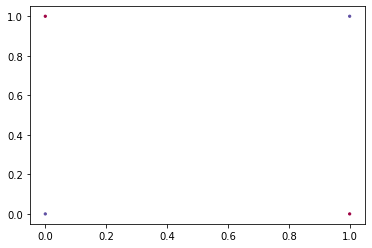

In [29]:
import sklearn
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import *
import matplotlib.pyplot as plt

X = np.asarray([[1,1],[1,0],[0,1],[0,0]])
y = np.asarray([1,0,0,1])
plt.scatter(X[:,0],X[:,1],s=5,c=y,cmap=plt.cm.Spectral)

X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.LongTensor)


In [236]:
class MyClassifier(nn.Module):
    def __init__(self):
        super(MyClassifier,self).__init__()
        #Our network consists of 3 layers. 1 input, 1 hidden and 1 output layer
        #This applies Linear transformation to input data. 
        self.fc1 = nn.Linear(2,3)
        #This applies linear transformation to produce output data
        #self.fc2 = nn.Linear(3,2)
        
    #This must be implemented
    def forward(self,x):
        #Output of the first layer
        # x = self.fc1(x)
        # #Activation function is Relu. Feel free to experiment with this
        # x = F.tanh(x)
        # # #This produces output
        # #x = self.fc2(x)
        return F.tanh(self.fc1(x), dim=1)
        
    #This function takes an input and predicts the class, (0 or 1)        
    def predict(self,x):
        #Apply softmax to output. 
        pred = self.forward(x)
        ans = []
        #Pick the class with maximum weight
        for t in pred:
            if t[0]>t[1]:
                ans.append(0)
            else:
                ans.append(1)
        return torch.tensor(ans)

In [237]:
#Initialize the model        
model = MyClassifier()
#Define loss criterion
criterion = nn.CrossEntropyLoss()
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [238]:
#Number of epochs
epochs = 100000
#List to store losses
losses = []
parameter1 = []
parameter2 = []
parameter3 = []
parameter4 = []
for i in range(epochs):
    #Precit the output for Given input
    y_pred = model.forward(X)
    #Compute Cross entropy loss
    loss = criterion(y_pred,y)
    #Add loss to the list
    losses.append(loss.item())
    #Clear the previous gradients
    optimizer.zero_grad()
    #Compute gradients
    loss.backward()
    #Adjust weights
    optimizer.step()
    parameter1.append(model.fc1.state_dict()['weight'])
    parameter2.append(model.fc1.state_dict()['bias'])
    # parameter3.append(model.fc2.state_dict()['weight'])
    # parameter4.append(model.fc2.state_dict()['bias'])
print(parameter1[-1])
print(parameter2[-1])
# print(parameter3[-1])
# print(parameter4[-1])

tensor([[ 0.7181,  0.5395],
        [ 0.7181,  0.5395],
        [-3.1150, -3.5588]])
tensor([  3.7970,   3.7970, -21.4659])


In [239]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X),y))

0.5


In [240]:
def predict(x):
 #Convert into numpy element to tensor
 x = torch.from_numpy(x).type(torch.FloatTensor)
 #Predict and return ans
 ans = model.predict(x)
 return ans.numpy()

In [241]:
def plot_decision_boundary(pred_func,X,y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

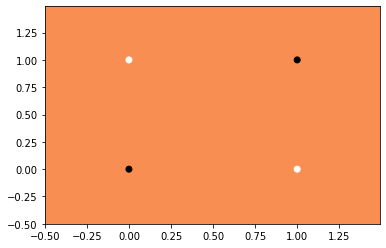

In [242]:
plot_decision_boundary(lambda x : predict(x) ,X.numpy(), y.numpy())

In [46]:
print(lambda x : predict(x))


<function <lambda> at 0x7ff8ae064830>


In [5]:
import numpy as np
import torch
# X = np.asarray([[1,1,0,0],[1,0,1,0]])
X = np.asarray([[1,1],[1,0],[0,1],[0,0]])
y = np.asarray([-1,1,1,-1])
X = torch.from_numpy(X).type(torch.FloatTensor)
y = torch.from_numpy(y).type(torch.FloatTensor)


In [6]:
import torch.nn as nn
import torch.nn.functional as F
w1 = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)
w2 = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)
b = torch.tensor(0.0,dtype = torch.float32,requires_grad = True)

def forward(x):
  # return w1 * x[:,0] + w2 * x[:,1] + b
  f = F.tanh(w1 * x[:,0] + w2 * x[:,1] + b)
  # for ind in f:
  #   if ind > 0:
  #     ind = 1
  #   elif ind < 0:
  #     ind = -1
  return f
def loss(y,y_predicted):
  lo = nn.MSELoss()
  l = lo(y,y_predicted)
  return l

learning_rate = 0.08
n_iters = 1000

for epoch in range(n_iters):
  y_pred = forward(X)
  l = loss(y,y_pred)

  l.backward()

  with torch.no_grad():
    w1 -= learning_rate * w1.grad
    w2 -= learning_rate * w2.grad
    b -= learning_rate * b.grad
  w1.grad.zero_()
  w2.grad.zero_()
  b.grad.zero_()
  if epoch % 100 == 0:
    print(f'epoch {epoch+1}: w1 = {w1:.3f},w2 = {w2:.3f},b = {b:.3f},loss = {l:.8f}')
test = np.asarray([[1,1],[1,0],[0,1],[0,0]])

test = torch.from_numpy(test).type(torch.FloatTensor)
r = forward(test)
print(r)
# print(f'prediction: f(5) = {forward(test):.3f}')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 101: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 201: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 301: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 401: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 501: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 601: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 701: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 801: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
epoch 901: w1 = 0.000,w2 = 0.000,b = 0.000,loss = 1.00000000
tensor([0., 0., 0., 0.], grad_fn=<TanhBackward0>)
